# Test Evaluation

In [1]:
import os 
import numpy as np
import tensorflow as tf
from tensorflow import keras as kr
from glob import glob
import matplotlib 
import matplotlib.pyplot as plt

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from keras.preprocessing.image import save_img

from tensorflow.keras.utils import to_categorical # calculate loss function with multiple classes


from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.constraints import max_norm #
import tensorflow.keras.callbacks

from tensorflow.keras.models import load_model

Using TensorFlow backend.


In [2]:

classifier = load_model("NN/D_25_H_22_M_50_S_49seq_net_312kp_32batch_60epoch_seperation.h5")
val_datagen = ImageDataGenerator(rescale=1./255)
val_data_dir = "DATA/evaluate_pics/data/"
val_generator = val_datagen.flow_from_directory(
        val_data_dir,
        target_size=(128, 128),
        batch_size=1,
        color_mode='rgb',
        class_mode='categorical',
        shuffle=True,
        seed=42)
val_samples = len(glob('%s/*/*.png' % val_data_dir))
#print("               [   loss   ,   accuracy   ]")
#print("val_generator: " + str(curr_model.evaluate_generator(val_generator, val_samples)))

Found 1500 images belonging to 5 classes.


In [ ]:
img_path = 'pics/front/Jan_22_hamburg_colors_day/val_data/phone/red_day00031.png'

img = image.load_img(img_path, target_size=(128, 128))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

plt.imshow(img_tensor[0])
plt.show()

print(img_tensor.shape)


In [4]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

#classenames = np.array(['crooked', 'drinking', 'noperson', 'phone', 'straight'])
classenames = np.array(['crooked', 'crooked', 'drinking', 'noperson', 'phone', 'phone', 'straight'])

images = np.vstack([x])
classes = classifier.predict_classes(images, batch_size=10)
print("Predicted class is:",classes , " which means", classenames[classes])

Predicted class is: [5]  which means ['phone']


In [5]:
layer_outputs = [layer.output for layer in classifier.layers[:12]] # Extracts the outputs of the top 12 layers
activation_model = kr.Model(inputs=classifier.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

In [6]:
activations = activation_model.predict(img_tensor) # Returns a list of five Numpy arrays: one array per layer activation

In [7]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 127, 127, 32)


In [ ]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

127
63
60
15
15
12
3


<ipython-input-9-6c09b7d0247b>:20: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


3
1152


IndexError: too many indices for array: array is 2-dimensional, but 4 were indexed

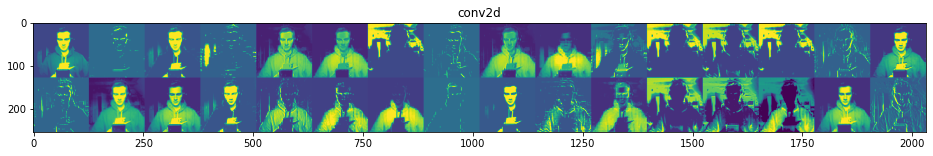

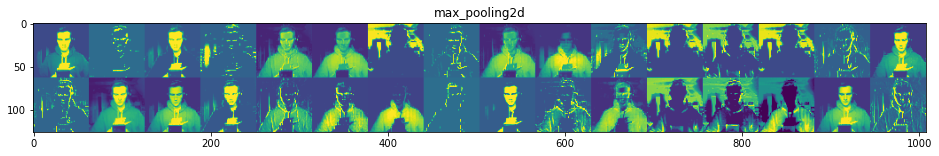

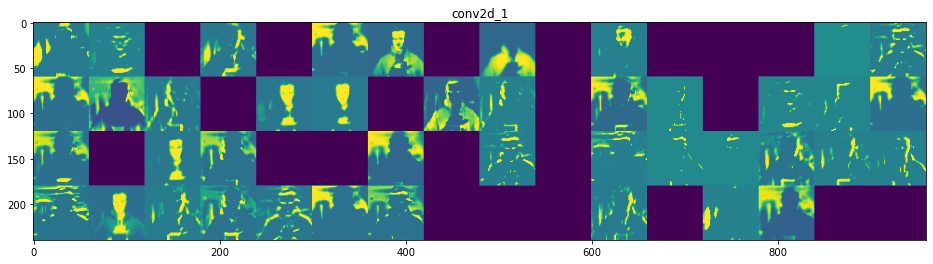

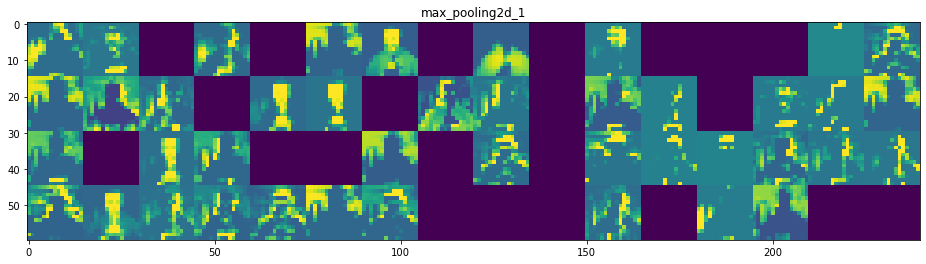

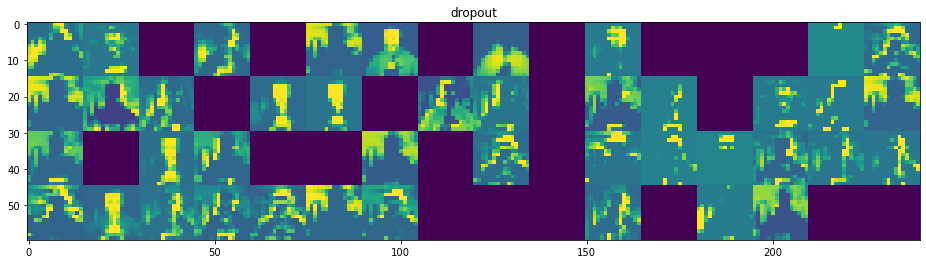

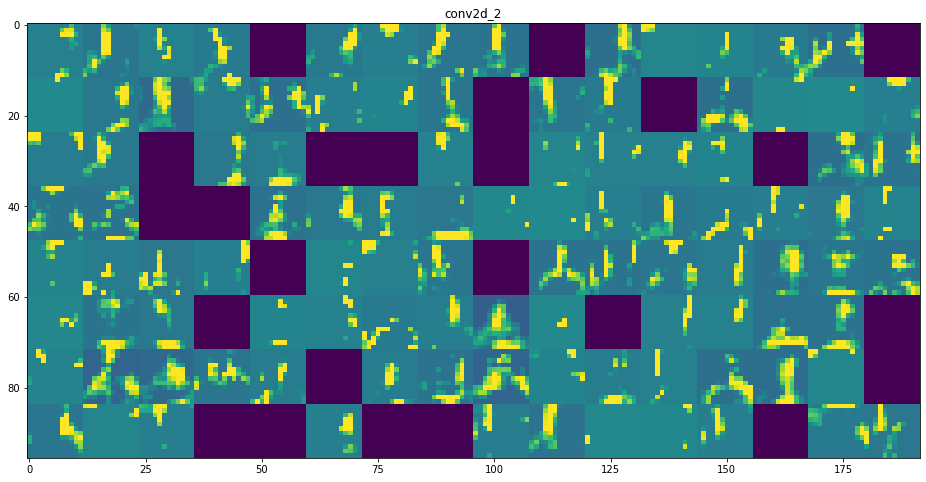

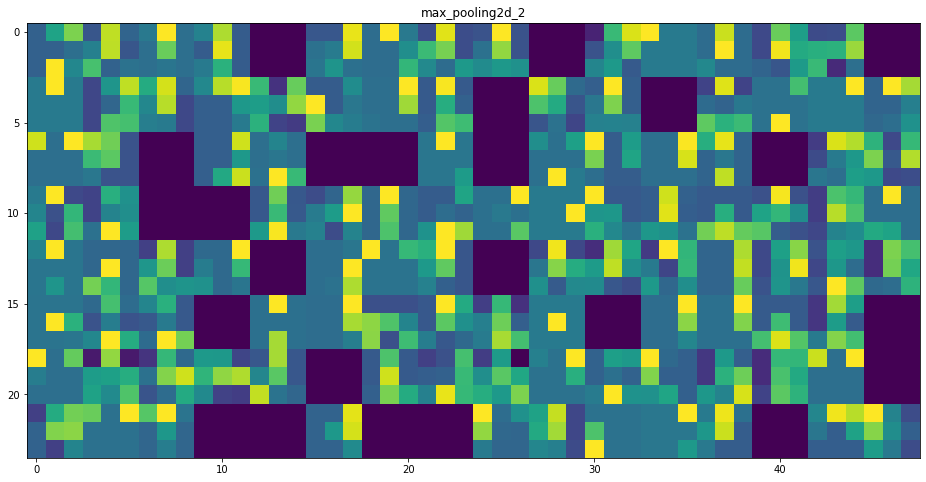

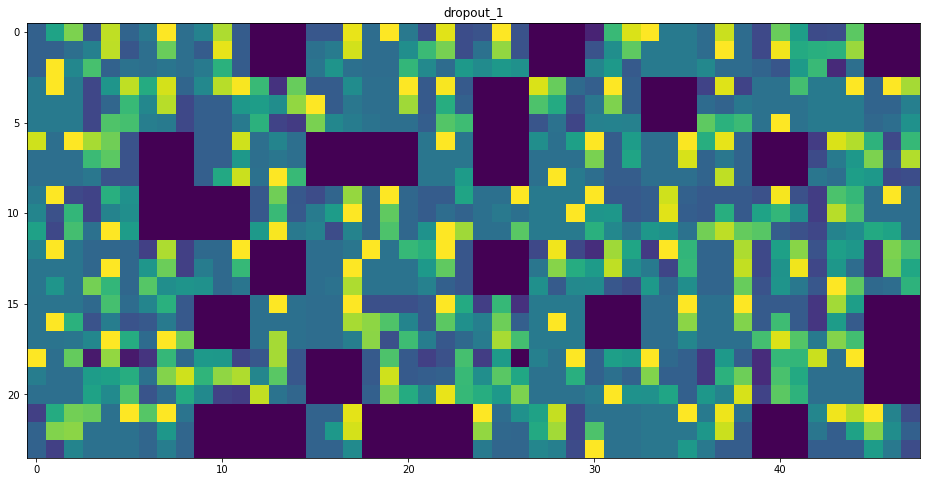

In [9]:
layer_names = []
for layer in classifier.layers[:12]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    #print(n_features)
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    print(size)
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')


# Pictures
 - For Night, Day
     - For drinking, crooked, phone, straight
         - 200 red
         - 200 blue
         - 200 grey
         - 200 lightgrey
         - 200 camo
         - 200 green
         - 200 white
      - noperson
      
      
- Seperation
    - crooked in crookedBACK and crookedFRONT + phone in phoneUP and phoneDOWN
         - 200 red
         - 200 blue
         - 200 grey
         - 200 lightgrey
         - 200 camo
         - 200 green
         - 200 white

# Visualize the data augmentation and batch size (Only used for visual aspects)

In [2]:
import os 
import numpy as np
import tensorflow as tf
from tensorflow import keras as kr
from glob import glob
import matplotlib 
import matplotlib.pyplot as plt

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from keras.preprocessing.image import save_img

from tensorflow.keras.utils import to_categorical # calculate loss function with multiple classes


from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.constraints import max_norm #
import tensorflow.keras.callbacks

from tensorflow.keras.models import load_model

Using TensorFlow backend.


In [ ]:
from mpl_toolkits.axes_grid1 import ImageGrid
import math
batchsize = 32
DATA_DIR = "Ausarbeitung/pics/Equality/Combined_Equal_Amount_To_Local_Classes/data/"
DIMENSION= (128, 128)

eval_datagen = ImageDataGenerator(rescale=1./255)
eval_generator = eval_datagen.flow_from_directory(
        DATA_DIR,
        target_size=DIMENSION,
        batch_size=batchsize, #Divide the images into baches - 5 means into 5 batches
        color_mode='grayscale',
        class_mode='categorical',
        shuffle=False,
        seed=42)

width_shift = int(DIMENSION[0]*0.3)
height_shift = 0#int(DIMENSION[1]*0.2)
flip=True
rotation_angle= 10# final rotations will be in the range [-rotation_angle, +rotation_angle]
zoom = [0.8, 1.2] #  [lower, upper]
shear = 5 # in degrees
brightness = [0.1, 1.5]

aug_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=width_shift,
    height_shift_range=height_shift,
    rotation_range=rotation_angle,
    zoom_range=zoom,
    shear_range=shear,
    horizontal_flip=flip,
    brightness_range=brightness)

aug_generator = aug_datagen.flow_from_directory(
        DATA_DIR,
        target_size=DIMENSION,
        batch_size=batchsize, #Divide the images into baches - 5 means into 5 batches
        color_mode='grayscale',
        class_mode='categorical',
        shuffle=False,
        seed=42)


x_Tbatch,y_Tbatch = next(aug_generator)
x_Vbatch,y_Vbatch = next(eval_generator)


batch = x_Vbatch
shape = int(math.sqrt(batch.shape[0]))
fig = plt.figure(figsize=(16., 16.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(shape, shape),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, batch):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
plt.show()


batch = x_Tbatch
shape = int(math.sqrt(batch.shape[0]))
fig = plt.figure(figsize=(16., 16.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(shape, shape),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, batch):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
plt.show()


# Plot Model

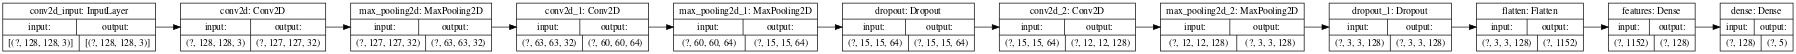

In [6]:
import tensorflow as tf
from tensorflow.keras.models import load_model
model = load_model("Ausarbeitung/NN/keras/Network/NORMAL/OneSort/D_17_H_10_M_52_312677param_32batch_30epoch_AUGset1_combined_Normal_SAFETY1773smpl.h5")
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True, dpi=50, rankdir='LR')